<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# YOUR CODE
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [16]:
data.iloc[1048]

ClientPeriod                                  0
MonthlySpending                           25.75
TotalSpent                                  0.0
Sex                                        Male
IsSeniorCitizen                               0
HasPartner                                  Yes
HasChild                                    Yes
HasPhoneService                             Yes
HasMultiplePhoneNumbers                     Yes
HasInternetService                           No
HasOnlineSecurityService    No internet service
HasOnlineBackup             No internet service
HasDeviceProtection         No internet service
HasTechSupportAccess        No internet service
HasOnlineTV                 No internet service
HasMovieSubscription        No internet service
HasContractPhone                       Two year
IsBillingPaperless                           No
PaymentMethod                      Mailed check
Churn                                         0
Name: 1048, dtype: object

In [7]:
data.isna().count()


ClientPeriod                5282
MonthlySpending             5282
TotalSpent                  5282
Sex                         5282
IsSeniorCitizen             5282
HasPartner                  5282
HasChild                    5282
HasPhoneService             5282
HasMultiplePhoneNumbers     5282
HasInternetService          5282
HasOnlineSecurityService    5282
HasOnlineBackup             5282
HasDeviceProtection         5282
HasTechSupportAccess        5282
HasOnlineTV                 5282
HasMovieSubscription        5282
HasContractPhone            5282
IsBillingPaperless          5282
PaymentMethod               5282
Churn                       5282
dtype: int64

In [8]:
n,m=data.shape

In [11]:
check = pd.read_csv('test.csv')

In [12]:
check.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [13]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [14]:
for i in range(5282):
  if (data.iloc[i,2]==' '):
    data.iloc[i,2]=0

In [15]:
data['TotalSpent'] = data['TotalSpent'].apply(pd.to_numeric, downcast='float', errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

(array([1205.,  565.,  425.,  423.,  388.,  362.,  340.,  364.,  377.,
         833.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

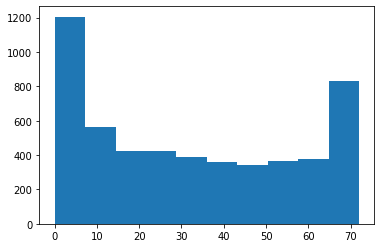

In [64]:
# YOUR CODE
plt.hist(data[::][num_cols[0]],bins=10)

(array([875., 332.,  64.,  78.,  79., 188., 236., 243., 179., 171., 328.,
        335., 376., 337., 325., 334., 296., 277., 154.,  75.]),
 array([ 18.25 ,  23.275,  28.3  ,  33.325,  38.35 ,  43.375,  48.4  ,
         53.425,  58.45 ,  63.475,  68.5  ,  73.525,  78.55 ,  83.575,
         88.6  ,  93.625,  98.65 , 103.675, 108.7  , 113.725, 118.75 ]),
 <a list of 20 Patch objects>)

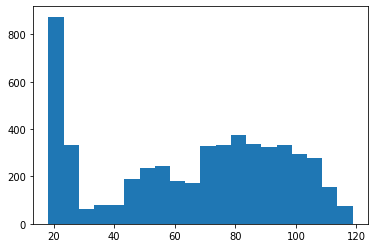

In [65]:
plt.hist(data[::][num_cols[1]],bins=20)

(array([2030.,  900.,  513.,  389.,  347.,  311.,  304.,  223.,  173.,
          92.]),
 array([   0.        ,  868.47998047, 1736.95996094, 2605.43994141,
        3473.91992188, 4342.39990234, 5210.87988281, 6079.35986328,
        6947.83984375, 7816.31982422, 8684.79980469]),
 <a list of 10 Patch objects>)

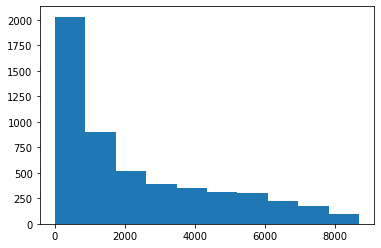

In [73]:
plt.hist(data[::][num_cols[2]])

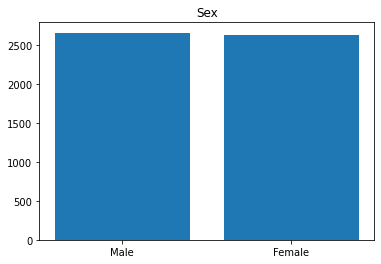

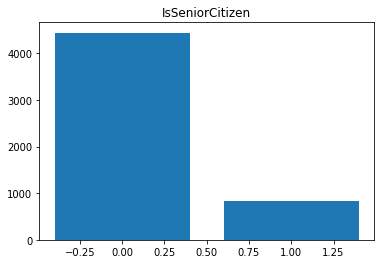

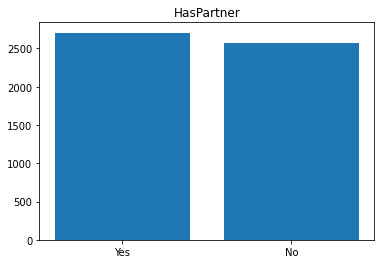

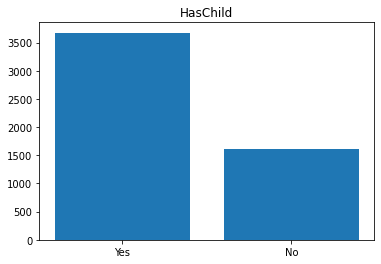

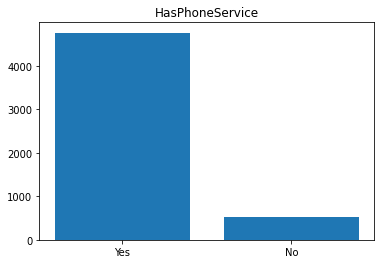

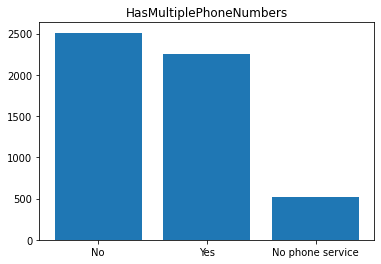

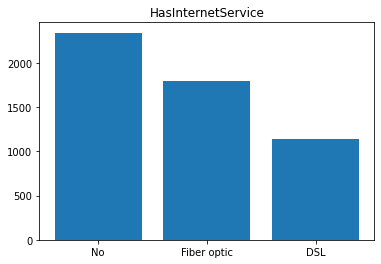

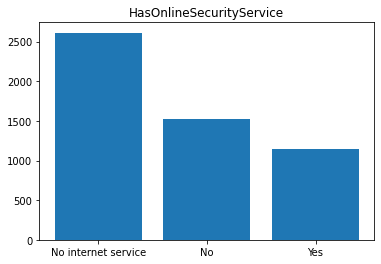

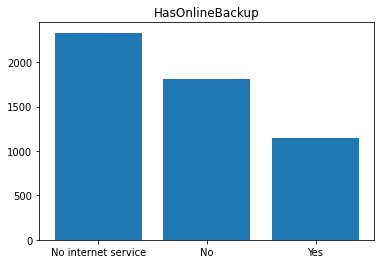

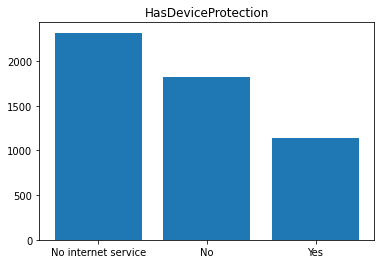

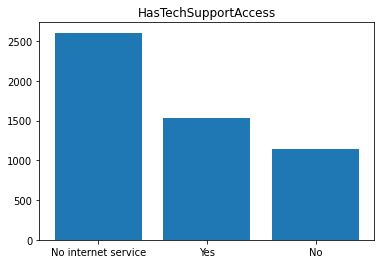

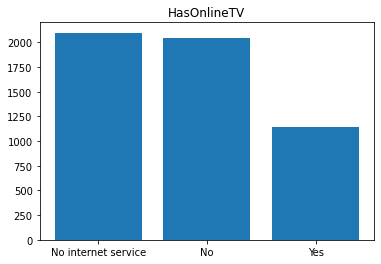

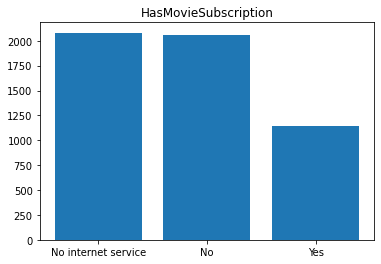

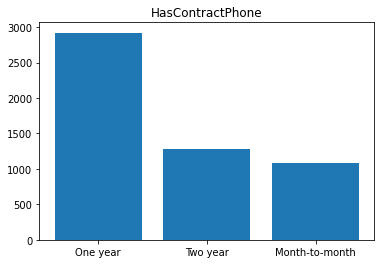

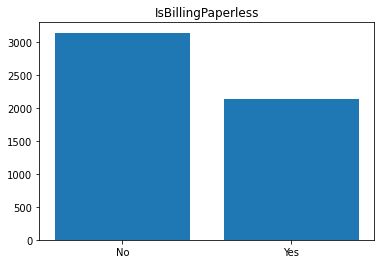

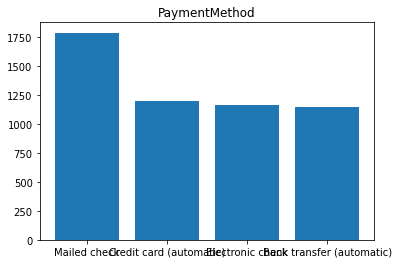

In [21]:
import pylab
k=0
for i in cat_cols:
  k+=1
  pylab.subplot (1,1, 1)
  plt.bar(data[::][i].unique(), height=data[::][i].value_counts())
  plt.title(i)
  pylab.show()

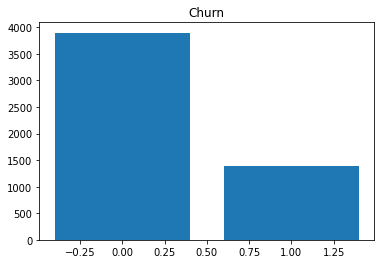

In [22]:
plt.bar(data[::][target_col].unique(), height=data[::][target_col].value_counts())
plt.title(target_col)
pylab.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [23]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [24]:
# YOUR CODE

In [25]:
OHE = OneHotEncoder(categories='auto', handle_unknown='error')

In [26]:
w=[]
for i in cat_cols:
  w.append(data[::][i].unique())
w

[array(['Male', 'Female'], dtype=object),
 array([0, 1]),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['No', 'Yes', 'No phone service'], dtype=object),
 array(['No', 'Fiber optic', 'DSL'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object),
 array(['No internet service', 'Yes', 'No'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object),
 array(['One year', 'Two year', 'Month-to-month'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Mailed check', 'Credit card (automatic)', 'Electronic check',
        'Bank transfer (automatic)'], dtype=object)]

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [27]:
z=pd.get_dummies(data[::][cat_cols])
nd=data[data.columns[[0,1,2]]]

In [28]:
y=pd.concat([nd,z],axis=1)

In [29]:
y

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.2,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.9,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
5278,50,44.45,2188.45,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0
5279,1,55.05,55.05,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5280,29,76.00,2215.25,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [34]:
tar=data[::]["Churn"]
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    y.values, tar.values, test_size=0.2, random_state=42)

In [35]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5282 non-null   int64  
 1   MonthlySpending                               5282 non-null   float64
 2   TotalSpent                                    5282 non-null   object 
 3   IsSeniorCitizen                               5282 non-null   int64  
 4   Sex_Female                                    5282 non-null   uint8  
 5   Sex_Male                                      5282 non-null   uint8  
 6   HasPartner_No                                 5282 non-null   uint8  
 7   HasPartner_Yes                                5282 non-null   uint8  
 8   HasChild_No                                   5282 non-null   uint8  
 9   HasChild_Yes                                  5282 non-null   u

In [36]:
model=LogisticRegression(penalty='l1', dual=False, tol=0.00001, C=0.5, fit_intercept=False, solver='saga')
# обучение модели
model.fit(train_feature_matrix, train_labels)
# предсказание на тестовой выборке
y_pred = model.predict(test_feature_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred)

0.7426679280983917

In [256]:
roc_auc_score(test_labels,y_pred)

0.6519103074408252

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [257]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    data.iloc[:,:-1], tar, test_size=0.2, random_state=42)

In [40]:
!pip install catboost 
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

     |████████████████████████████████| 76.4 MB 34 kB/s 


In [262]:
from catboost import CatBoostClassifier
CBC2 = CatBoostClassifier(cat_features=cat_cols).fit(X=train_feature_matrix, y=train_labels)

Learning rate set to 0.019062
0:	learn: 0.6802202	total: 16.4ms	remaining: 16.4s
1:	learn: 0.6676204	total: 31.5ms	remaining: 15.7s
2:	learn: 0.6558795	total: 47.2ms	remaining: 15.7s
3:	learn: 0.6457028	total: 55.3ms	remaining: 13.8s
4:	learn: 0.6338911	total: 79ms	remaining: 15.7s
5:	learn: 0.6235039	total: 94.7ms	remaining: 15.7s
6:	learn: 0.6147887	total: 104ms	remaining: 14.8s
7:	learn: 0.6061780	total: 118ms	remaining: 14.6s
8:	learn: 0.5986740	total: 123ms	remaining: 13.6s
9:	learn: 0.5904615	total: 136ms	remaining: 13.5s
10:	learn: 0.5825070	total: 153ms	remaining: 13.8s
11:	learn: 0.5748601	total: 168ms	remaining: 13.8s
12:	learn: 0.5674660	total: 184ms	remaining: 13.9s
13:	learn: 0.5606648	total: 197ms	remaining: 13.9s
14:	learn: 0.5540216	total: 215ms	remaining: 14.1s
15:	learn: 0.5475793	total: 229ms	remaining: 14.1s
16:	learn: 0.5414257	total: 245ms	remaining: 14.2s
17:	learn: 0.5357865	total: 260ms	remaining: 14.2s
18:	learn: 0.5299627	total: 275ms	remaining: 14.2s
19:	lea

In [263]:
t=CBC2.predict(test_feature_matrix)

In [264]:
roc_auc_score(test_labels,t)

0.6783530813346755

In [266]:
CBC1 = CatBoostClassifier(cat_features=cat_cols)

grid  = {
    'learning_rate': [0.1,0.5, 0.6,0.7,1],
        'depth': [4,5,6,7,10],
         'iterations' : [100,200,300],
         'leaf_estimation_iterations': [1,5,10,20,None],
         'l2_leaf_reg':[1,100],
         'random_strength':[1,2,10],
          'bagging_temperature':[0,1,10]        
}

grid_search_result = CBC1.grid_search(grid, X=train_feature_matrix, y=train_labels, plot=True,cv=5,partition_random_seed=42, refit=True)

2:	learn: 0.4763616	test: 0.4944399	best: 0.4944399 (2)	total: 39.5ms	remaining: 2.6s
3:	learn: 0.4689053	test: 0.4864797	best: 0.4864797 (3)	total: 43.7ms	remaining: 2.14s
4:	learn: 0.4536407	test: 0.4697935	best: 0.4697935 (4)	total: 46.6ms	remaining: 1.82s
5:	learn: 0.4454700	test: 0.4623751	best: 0.4623751 (5)	total: 104ms	remaining: 3.37s
6:	learn: 0.4384329	test: 0.4544844	best: 0.4544844 (6)	total: 111ms	remaining: 3.05s
7:	learn: 0.4316406	test: 0.4481836	best: 0.4481836 (7)	total: 122ms	remaining: 2.93s
8:	learn: 0.4285034	test: 0.4463008	best: 0.4463008 (8)	total: 148ms	remaining: 3.14s
9:	learn: 0.4240808	test: 0.4418126	best: 0.4418126 (9)	total: 151ms	remaining: 2.87s
10:	learn: 0.4203699	test: 0.4381243	best: 0.4381243 (10)	total: 160ms	remaining: 2.75s
11:	learn: 0.4181673	test: 0.4369957	best: 0.4369957 (11)	total: 214ms	remaining: 3.36s
12:	learn: 0.4169374	test: 0.4361023	best: 0.4361023 (12)	total: 276ms	remaining: 3.97s
13:	learn: 0.4155377	test: 0.4349033	best: 0.4

KeyboardInterrupt: ignored

In [236]:
CBC1.get_best_score()

{'learn': {'Logloss': 0.37637342037001686}}

In [237]:
grid_search_result['params']

{'depth': 4,
 'iterations': 100,
 'l2_leaf_reg': 200,
 'leaf_estimation_iterations': 10,
 'learning_rate': 0.7}

In [267]:
CBC = CatBoostClassifier(learning_rate=0.7,
        depth=5,
         iterations = 300,
         leaf_estimation_iterations= 5,
         l2_leaf_reg=1,
         random_strength=1,
          bagging_temperature=1,custom_metric='AUC', cat_features=cat_cols).fit(X=train_feature_matrix, y=train_labels,plot=True)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4750206	total: 16.5ms	remaining: 4.94s
1:	learn: 0.4401441	total: 23.9ms	remaining: 3.56s
2:	learn: 0.4216752	total: 35.6ms	remaining: 3.53s
3:	learn: 0.4102182	total: 45.5ms	remaining: 3.37s
4:	learn: 0.4027088	total: 58ms	remaining: 3.42s
5:	learn: 0.3985859	total: 69.1ms	remaining: 3.38s
6:	learn: 0.3948814	total: 81.2ms	remaining: 3.4s
7:	learn: 0.3912632	total: 92.3ms	remaining: 3.37s
8:	learn: 0.3909942	total: 101ms	remaining: 3.27s
9:	learn: 0.3876334	total: 112ms	remaining: 3.25s
10:	learn: 0.3864114	total: 123ms	remaining: 3.23s
11:	learn: 0.3835175	total: 135ms	remaining: 3.25s
12:	learn: 0.3809741	total: 146ms	remaining: 3.22s
13:	learn: 0.3793061	total: 157ms	remaining: 3.21s
14:	learn: 0.3750042	total: 168ms	remaining: 3.18s
15:	learn: 0.3714755	total: 180ms	remaining: 3.2s
16:	learn: 0.3701739	total: 192ms	remaining: 3.2s
17:	learn: 0.3673896	total: 203ms	remaining: 3.18s
18:	learn: 0.3654046	total: 214ms	remaining: 3.16s
19:	learn: 0.3644465	total: 228ms	rema

In [268]:
e = CBC.predict(test_feature_matrix)

In [269]:
roc_auc_score(test_labels,e)

0.6806803594351732

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [270]:
best_model = CBC# какая-то предыдущая модель

In [271]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] =best_model.predict(check) # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.astype('str')
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.